In [86]:
from ipynb.fs.full.gbs import *

In [58]:
from scipy.stats import norm

distr = norm()
reals = distr.rvs(size=(50,100))
imags = distr.rvs(size=(50,100))
print(reals + 1j * imags)

[[0.228-1.040j -0.731+1.236j 0.878+0.210j ... -1.173-0.391j -0.373-1.734j
  -1.057+0.695j]
 [0.205-1.954j -2.274-0.612j 0.487+0.567j ... 0.607-0.725j 0.575+0.558j
  -1.022-0.587j]
 [1.239-0.310j 0.379-0.172j -0.011-2.918j ... -0.148-0.022j 0.007+0.849j
  0.378-0.650j]
 ...
 [2.289-0.370j 1.508-0.312j -2.715-0.272j ... 0.478+0.461j 0.255-0.941j
  -0.271+1.431j]
 [0.172+0.777j -1.403-0.267j 1.668+0.905j ... -2.971-0.786j 0.274+1.386j
  1.309-0.964j]
 [1.014+0.457j 0.251-0.115j -0.048+0.184j ... -0.156+2.299j 0.657+2.306j
  -1.198+0.532j]]


In [59]:
arr = zpf(1000, 2, 1)
# %timeit np.trace(arr.T @ arr) 
# %timeit np.trace(arr @ arr.T)
# %timeit np.trace((arr @ arr.T if arr.shape[0] < arr.shape[1] else arr.T @ arr)) # fastest
print(np.trace(arr.T @ arr), np.trace(arr @ arr.T))

# Output:
# 10.1 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# 15 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
# 12.7 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

(-48.935420931701174-50.2907225152231j) (-48.93542093170119-50.29072251522309j)


In [60]:
print(np.eye(2) * np.ones((2,2)))           # elementwise product
print(np.eye(2) @ np.ones((2,2)))           # matrix product
print(np.kron(np.eye(2), np.ones((2,2))))   # kronecker product

[[1. 0.]
 [0. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


/home/ronakr/installations/anaconda3/envs/ronakr/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/ronakr/installations/anaconda3/envs/ronakr/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


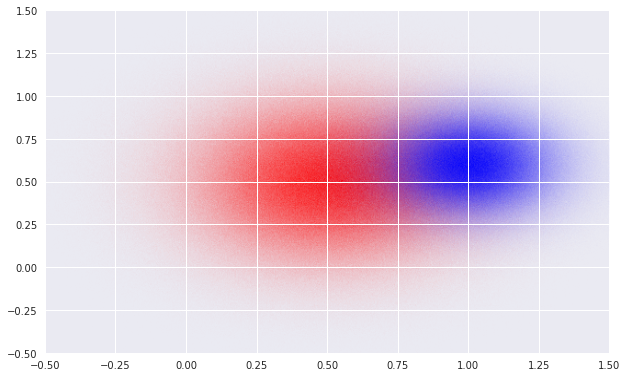

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

n = 10000000

x = np.random.normal(0.5, 0.3, n)
y = np.random.normal(0.5, 0.3, n)

ax.scatter_density(x, y, color='red')

x = np.random.normal(1.0, 0.2, n)
y = np.random.normal(0.6, 0.2, n)

ax.scatter_density(x, y, color='blue')

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

fig.savefig('double.png')

In [69]:
def plot_scatter(x, y, title=None, color='blue', savefile=False, poly_regr_deg=None):

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

    if title:
        plt.title(label=title)

    ax.scatter_density(x, y, color=color)

    fit=None
    if poly_regr_deg:
        p = P.fit(x, y, poly_regr_deg, window=[np.min(x), np.max(x)])
        xx, yy = p.linspace()
        ax.plot(xx, yy, lw=2)
        at = AnchoredText(
            str(p), prop=dict(size=15), frameon=True, loc='upper left')
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        fit = p
    
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(y), np.max(y))

    if savefile:
        fig.savefig(savefile)

    return fit

In [63]:
def plot_complex(arr, **kwargs):
    plot_scatter(np.real(arr), np.imag(arr), **kwargs)

In [64]:
a,b = ent(N=1000000, r=1, t=2, phase=0)

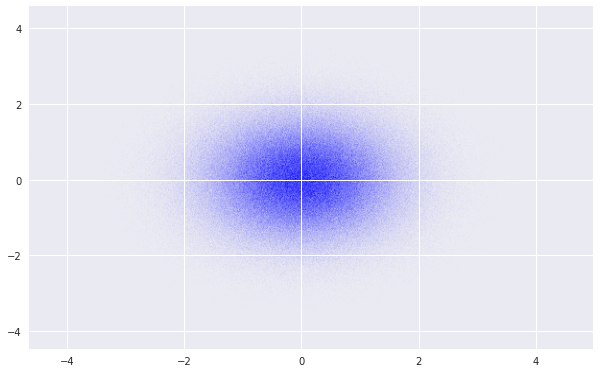

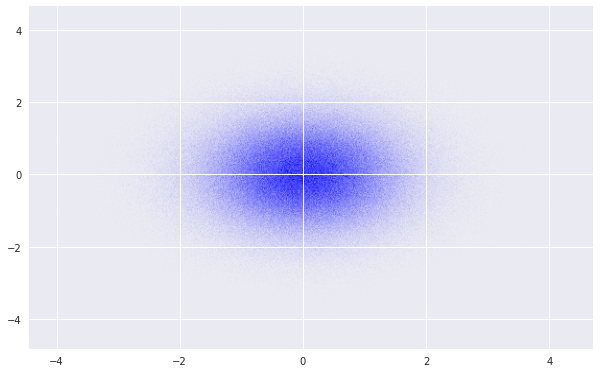

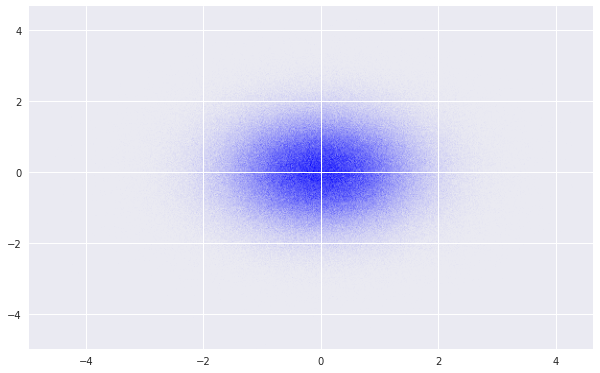

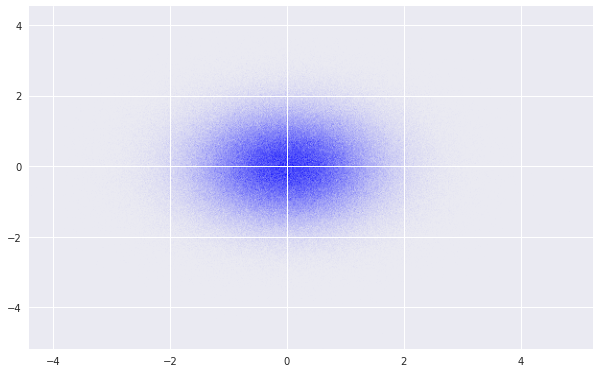

In [65]:
plot_complex(a[0,:])
plot_complex(a[1,:])
plot_complex(b[0,:])
plot_complex(b[1,:])

/home/ronakr/installations/anaconda3/envs/ronakr/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/ronakr/installations/anaconda3/envs/ronakr/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


Polynomial([ 1.21576156e+00, -1.00114026e-03], domain=[1.02351361e-03, 4.89696704e+00], window=[1.02351361e-03, 4.89696704e+00])

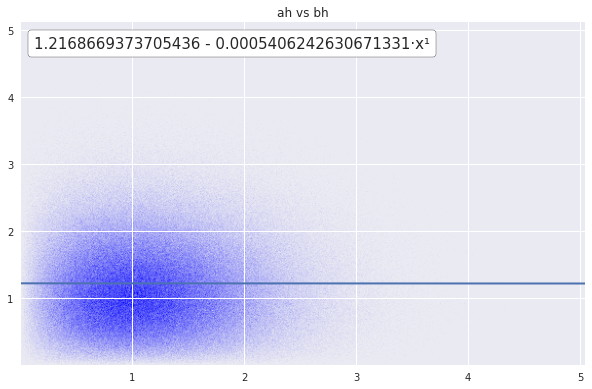

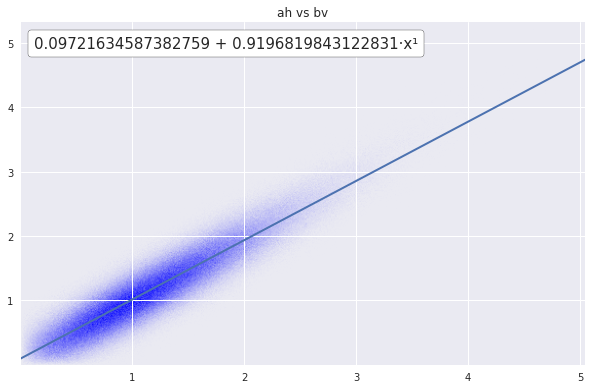

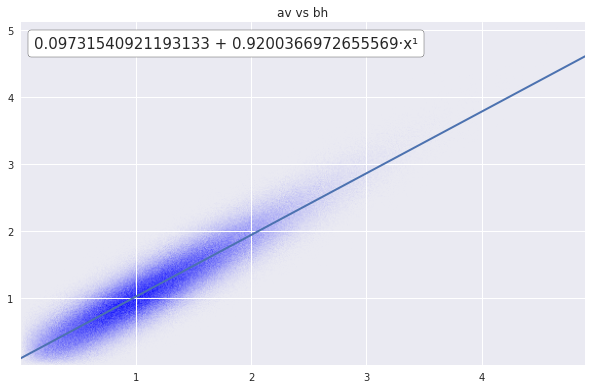

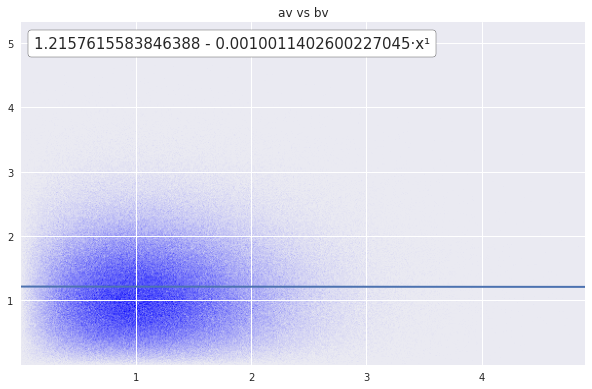

In [70]:
ah = np.abs(a[0,:])
av = np.abs(a[1,:])
bh = np.abs(b[0,:])
bv = np.abs(b[1,:])

plot_scatter(ah, bh, poly_regr_deg=1, title="ah vs bh")
plot_scatter(ah, bv, poly_regr_deg=1, title="ah vs bv")
plot_scatter(av, bh, poly_regr_deg=1, title="av vs bh")
plot_scatter(av, bv, poly_regr_deg=1, title="av vs bv")

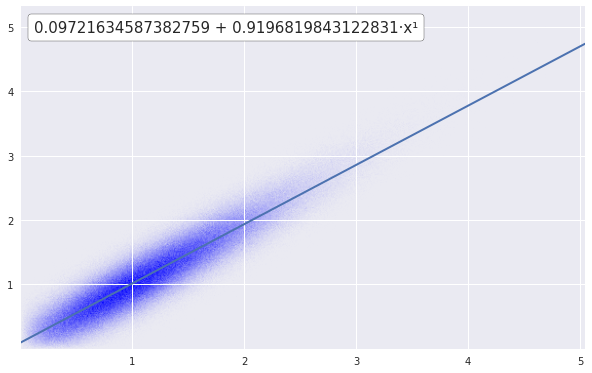

In [71]:
p = plot_scatter(ah, bv, poly_regr_deg=1, savefile='hv_vh_entangled.png')

In [ ]:
# Failed: no way to distinguish |HH> + |VV> from |HH> - |VV> from probability distr alone

# def get_phase(c):
#     return np.arctan(np.imag(c)/np.real(c))
# phase_difference = get_phase(a[0,:]) - get_phase(b[1,:])

# plot hist

In [ ]:
print(p)
print(p(0))
xx, yy = p.linspace()
print(xx[:10])
print(yy[:10])
print(p(xx[:10]))

0.09607368459418848 + 0.9206623551312216·x¹
0.09607368459418848
[0.00125025 0.05172213 0.102194   0.15266588 0.20313776 0.25360963
 0.30408151 0.35455339 0.40502526 0.45549714]
[0.09722475 0.1436923  0.19015986 0.23662741 0.28309497 0.32956253
 0.37603008 0.42249764 0.4689652  0.51543275]
[0.09722475 0.1436923  0.19015986 0.23662741 0.28309497 0.32956253
 0.37603008 0.42249764 0.4689652  0.51543275]


In [ ]:
print(p)
print(p(0))
print(p(1)-p(0))
print(p(2)-p(1))

0.09607368459418848 + 0.9206623551312216·x¹
0.09607368459418848
0.9206623551312216
0.9206623551312216


In [ ]:
a,b = ent(N=1000000, r=1, t=2, phase=0)
np.set_printoptions(formatter={'complex_kind': '{:.3f}'.format})
#print(np.cov(a,b),2)
print(np.corrcoef(a,b))
#print(np.cov(a[0,:],b[0,:]))
print(np.corrcoef(a[0,:],b[0,:]))
#print(np.cov(a[0,:],b[1,:]))
print(np.corrcoef(a[0,:],b[1,:]))
#print(np.cov(a[1,:],b[0,:]))
print(np.corrcoef(a[1,:],b[0,:]))
#print(np.cov(a[1,:],b[1,:]))
print(np.corrcoef(a[1,:],b[1,:]))

# 0.5, 1.88, 13.66, 100.9, 745.66, 5501
# plot_scatter(np.linspace(0,5,6), [0.5, 1.88, 13.66, 100.9, 745.66, 5501], poly_regr_deg=5)


[[1.000+0.000j -0.000-0.000j -0.000-0.000j 0.003+0.000j]
 [-0.000+0.000j 1.000+0.000j 0.001-0.001j -0.000+0.000j]
 [-0.000+0.000j 0.001+0.001j 1.000+0.000j 0.000-0.000j]
 [0.003-0.000j -0.000-0.000j 0.000+0.000j 1.000+0.000j]]
[[1.000+0.000j -0.000-0.000j]
 [-0.000+0.000j 1.000+0.000j]]
[[1.000+0.000j 0.003+0.000j]
 [0.003-0.000j 1.000+0.000j]]
[[1.000+0.000j 0.001-0.001j]
 [0.001+0.001j 1.000+0.000j]]
[[1.000+0.000j -0.000+0.000j]
 [-0.000-0.000j 1.000+0.000j]]


In [1]:
from array import array

d = {}
a = array('i', [1,2,3])
d[a] = 5.5

TypeError: unhashable type: 'array.array'

In [45]:
@cache
def get_fock_basis_states(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    if m == 1:
        return np.array([[n]], dtype=int_type)
    if n == 1:
        return np.eye(m, dtype=int_type)

    states = None
    for i in range(0,n+1):
        sub_states = get_fock_basis_states(n-i, m-1)
        first_mode = np.full((sub_states.shape[0],1), i)
        new_states = np.concatenate((first_mode, sub_states), axis=1)
        if i == 0:
            states = new_states
        else:
            states = np.concatenate((states, new_states))
    return states

In [46]:
@cache
def imp1(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    return imp1_helper(n, m, int_type)

@cache
def imp1_helper(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if m == 1:
        return np.array([[n]], dtype=int_type)
    if n == 1:
        return np.eye(m, dtype=int_type)

    sub_states = imp1_helper(n, m-1)
    first_mode = np.full((sub_states.shape[0],1), 0)
    states = np.concatenate((first_mode, sub_states), axis=1)
    for i in range(1,n+1):
        sub_states = imp1_helper(n-i, m-1)
        first_mode = np.full((sub_states.shape[0],1), i)
        new_states = np.concatenate((first_mode, sub_states), axis=1)
        states = np.concatenate((states, new_states))
        
    return states

In [47]:
@cache
def imp11(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    return tuple(map(tuple,imp1_helper(n, m, int_type)))

In [76]:
@cache
def imp12(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    return list(map(tuple,imp1_helper(n, m, int_type)))

In [77]:
@cache
def imp13(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    np_state_list = imp1_helper(n, m, int_type)
    states = []
    for state in np_state_list:
        states.append(tuple(state))
    return states

In [64]:
def imp2(n, m):
    '''Returns a python array of all (n + m - 1 Choose n) Fock basis 
    states (as tuples) with n particles in m modes.'''

    # These checks are a loop invariant of the 
    # loop in the helper, so we only need to check 
    # them before starting the loop.
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    return imp2_helper(n, m)

@cache
def imp2_helper(n, m):
    '''Should never be called outside of imp2. See imp2.'''

    if m == 1:
        return [(n,)]
    if n == 1:
        return [(0,)*(i) + (1,) + (0,)*(m-i-1) for i in range(m)]

    states = []
    for i in range(0,n+1):
        new_states = imp2_helper(n-i, m-1)
        for s in range(len(new_states)):
            new_states[s] = (i,) + new_states[s]
        states += new_states
        
    return states

In [82]:
helpers = {imp1: imp1_helper, imp11: imp1_helper, imp12: imp1_helper, imp13: imp1_helper, imp2: imp2_helper}
def cc(f, *vargs, **kwargs):
    out = f(*vargs, **kwargs)
    f.cache_clear()
    if f in helpers:
        helpers[f].cache_clear()
    return out

In [84]:
num_src = 4
n = 2*num_src
m = 2*n
truth = get_fock_basis_states(n,m)
assert(np.array_equal(imp1(n,m), truth))
assert(np.array_equal(imp11(n,m), truth))
assert(np.array_equal(imp12(n,m), truth))
assert(np.array_equal(imp13(n,m), truth))
# assert(np.array_equal(imp2(n,m), truth))
# print(imp1(n,m)[:20])
# print(imp2(n,m)[:20])

for f in [get_fock_basis_states, imp1, imp11, imp12, imp13, imp2]:
    cc(f,n,m)
    
%timeit cc(get_fock_basis_states,n,m)
%timeit cc(get_fock_basis_states,n,m,int_type=np.int64)
%timeit cc(imp1,n,m)
%timeit cc(imp11,n,m)
%timeit cc(imp12,n,m)
%timeit cc(imp13,n,m)
%timeit cc(imp2,n,m)

226 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
222 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
209 ms ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.16 s ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.17 s ± 31.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.2 s ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
756 ms ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
import sys
aar = [[1,2,3],[4,5,6],[1,2,3],[7,3,6]]*30
arr = [(1,2,3),(4,5,6),(1,2,3),(7,3,6)]*30
tup = ((1,2,3),(4,5,6),(1,2,3),(7,3,6))*30
print(sys.getsizeof(aar))
print(sys.getsizeof(arr))
print(sys.getsizeof(tup))
print(sys.getsizeof(aar[0]))
print(sys.getsizeof(arr[0]))
print(sys.getsizeof(tup[0]))

# d = {}
# d[aar[0]] = 7

def add_tup():
    tup = ()
    for i in range(1000):
        tup += (i,)
        
def add_arr():
    arr = []
    for i in range(1000):
        arr += [i]

%timeit add_tup()
%timeit add_arr()

1016
1016
1000
120
64
64
1.31 ms ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
76.7 µs ± 1.85 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [59]:
(4,) + (100,200)

a = []
a += [100,200]
a += [100]
print(a)

[100, 200, 100]


In [89]:
# l_ent,r_ent = ent(N=1000, r=1, t=1, phase=0)
# print(l_ent)
# l_ent = polarizer(l_ent, theta=0, phi=0)
# pbs_1,pbs_2 = pbs(r_ent)

# dl = threshold_detector(l_ent).any(axis=0)
# dr1 = threshold_detector(pbs_1).any(axis=0)
# dr2 = threshold_detector(pbs_2).any(axis=0)

# post_dr1 = dr1[dl]
# post_dr2 = dr2[dl]

# counts = get_all_coincidence_counts(np.concatenate(post_dr1,post_dr2))
# a = counts.keys()
# b = counts.values()

[[-0.41559476-0.57664147j  0.30025186+0.11493831j -0.37407828+0.06926945j
  ...  0.105433  -0.24942133j  1.13308643+0.67065821j
  -0.26957374-0.27576122j]
 [-0.57704753+0.975717j    1.68964152+2.53237426j -0.04096857+1.23476761j
  ... -0.30293181-0.2011549j  -0.95027968-0.66290542j
   0.80543087-0.56618315j]]


ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)